# Log Data Example

<div class="alert alert-block alert-info">
    
This example demonstrates how to import and process data from the [CARWatch App](https://play.google.com/store/apps/details?id=de.fau.cs.mad.carwatch) used to record logs during cortisol awakening response (CAR) assessment studies at home.
  
</div>

## Imports and Helper Functions

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from carwatch.logs import ParticipantLogs, StudyLogs

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
base_path = Path("../example_data")

pprint([f for f in sorted(base_path.glob("*")) if f.is_dir() and not f.name.startswith(".")])

[PosixPath('../example_data/complete'),
 PosixPath('../example_data/corrupt'),
 PosixPath('../example_data/missing_awakening'),
 PosixPath('../example_data/missing_samples')]


## Log Files from Single Participant (`ParticipantLogs`)

Log files can either be imported by (1) loading the `.zip` files obtained by the *CARWatch App* or (2) by loading a folder from a participant what contains the log files as `.csv` files.

For (1), the file structure is assumed to look like:
```
. (base folder)
├── logs_ABC12.zip
├── logs_DEF34.zip
├── logs_GHI56.zip
├── logs_JKL78.zip
...
```

For (2), the file structure is assumed to look like:
```
. (base folder)
├── ABC12/
│   ├── carwatch_abc12_20200101.csv
│   ├── carwatch_abc12_20200102.csv
│   └── carwatch_abc12_20200103.csv
├── DEF34/
│   ├── carwatch_def34_20200201.csv
│   ├── carwatch_def34_20200202.csv
│   └── carwatch_def34_20200203.csv
...
```

### Import

#### From zip File

This example assumes simply loads a zipped log file from one participant as it was exported by the CARWatch application (case (1) in the explanation above). Thus, we search for files that end with `*.zip`.

In [3]:
# show contents of the example data folder
log_files = sorted(base_path.joinpath("complete/zip_files").glob("*.zip"))
log_files

[PosixPath('../example_data/complete/zip_files/logs_AB12C.zip'),
 PosixPath('../example_data/complete/zip_files/logs_DE34F.zip'),
 PosixPath('../example_data/complete/zip_files/logs_GH56I.zip')]

Select one file and import the participant logs

**Note:** Per default, the log files are simply loaded from the zip file and not extracted.
If you want to extract the log files from the zip file, you can set `extract_folder=True`. This will create a folder with the same name as the zip file and extract the log files into this folder. If you additionally, want to overwrite existing log files in the folder, you can set `overwrite_unzipped_logs=True`.

In [4]:
# Load log data from zip file:
zip_path = Path(log_files[0])
log = ParticipantLogs.from_zip_file(zip_path, extract_folder=False, overwrite_unzipped_logs=False)

Print some information about the participant

In [5]:
print(f"Subject ID: {log.subject_id}")
print(f"Start date: {log.start_date}")
print(f"End date: {log.end_date}")

Subject ID: AB12C
Start date: 2019-12-05 00:00:00+01:00
End date: 2019-12-08 00:00:00+01:00


Print some log metadata

In [6]:
print(f"App version: {log.app_version}")
print(f"Android Version: {log.android_version}")
print(f"Smartphone Model: {log.phone_model}")
print(f"Smartphone Manufacturer: {log.phone_manufacturer}")

App version: 1.1.0
Android Version: 28
Smartphone Model: ONEPLUS A6013
Smartphone Manufacturer: OnePlus


Convert the log files into a dataframe

In [7]:
df = log.data_as_df()
df.head()

,action,extras
time,,
2019-12-05 10:50:29.038000+01:00,subject_id_set,"{""subject_id"": ""AB12C"", ""subject_condition"": ""..."
2019-12-05 10:50:29.039000+01:00,app_metadata,"{""version_code"": 10100, ""version_name"": ""1.1.0..."
2019-12-05 10:50:29.039000+01:00,phone_metadata,"{""brand"": ""OnePlus"", ""manufacturer"": ""OnePlus""..."
2019-12-06 22:53:11.157000+01:00,evening_salivette,"{""id"": 815}"
2019-12-06 22:53:15.200000+01:00,barcode_scan_init,{}


Split Log Data by Sampling Days

In [8]:
log.split_sampling_days()

action  \
date       time                                                  
2019-12-05 2019-12-05 10:50:29.038000+01:00     subject_id_set   
           2019-12-05 10:50:29.039000+01:00       app_metadata   
           2019-12-05 10:50:29.039000+01:00     phone_metadata   
2019-12-07 2019-12-06 22:53:11.157000+01:00  evening_salivette   
           2019-12-06 22:53:15.200000+01:00  barcode_scan_init   
...                                                        ...   
2019-12-08 2019-12-08 09:48:05.257000+01:00       day_finished   
2019-12-09 2019-12-08 22:28:30.238000+01:00  evening_salivette   
           2019-12-08 22:28:33.620000+01:00  barcode_scan_init   
           2019-12-08 22:29:10.776000+01:00    barcode_scanned   
           2019-12-08 22:31:17.593000+01:00    service_started   

                                                                                        extras  
date       time                                                                                 
2019-12-05 2019-12-05 10:50:29.038000+01:00  {"subject_id": "AB12C", "subject_condition": "...  
           2019-12-05 10:50:29.039000+01:00  {"version_code": 10100, "version_name": "1.1.0...  
           2019-12-05 10:50:29.039000+01:00  {"brand": "OnePlus", "manufacturer": "OnePlus"...  
2019-12-07 2019-12-06 22:53:11.157000+01:00                                        {"id": 815}  
           2019-12-06 22:53:15.200000+01:00                                                 {}  
...                                                                                        ...  
2019-12-08 2019-12-08 09:48:05.257000+01:00                                 {"day_counter": 1}  
2019-12-09 2019-12-08 22:28:30.238000+01:00                                        {"id": 815}  
           2019-12-08 22:28:33.620000+01:00                                                 {}  
           2019-12-08 22:29:10.776000+01:00  {"id": 815, "saliva_id": 5, "barcode_value": "...  
           2019-12-08 22:31:17.593000+01:00                                                 {}  

[83 rows x 2 columns]

#### From Folder

This example assumes that the zipped log files from one participant are already unpacked and stored in one directory (case (2) in the explanation above). Thus, we search for directories that start with `logs_`.

**Note:** While the variant above seems more straightforwards, as you don't have to unzip all log files, this method can be useful when the log files were already unzipped, e.g., because they were manually cleaned.

In [9]:
log_folders = [f for f in sorted(base_path.joinpath("complete/folders").glob("*")) if f.is_dir() and f.name.startswith("logs")]
log_folders

[PosixPath('../example_data/complete/folders/logs_AB12C'),
 PosixPath('../example_data/complete/folders/logs_DE34F'),
 PosixPath('../example_data/complete/folders/logs_GH56I')]


### Filtering/Selecting

Filter by Action

In [14]:
log.filter_logs(action="barcode_scanned")

,action,extras
time,,
2019-12-05 22:41:18.723000+01:00,barcode_scanned,"{""id"": 815, ""saliva_id"": 5, ""barcode_value"": ""..."
2019-12-06 08:52:42.569000+01:00,barcode_scanned,"{""id"": 4711, ""saliva_id"": 0, ""barcode_value"": ..."
2019-12-06 09:08:01.685000+01:00,barcode_scanned,"{""id"": 37478, ""saliva_id"": 1, ""barcode_value"":..."
2019-12-06 09:23:18.166000+01:00,barcode_scanned,"{""id"": 70245, ""saliva_id"": 2, ""barcode_value"":..."
2019-12-06 09:38:36.232000+01:00,barcode_scanned,"{""id"": 103012, ""saliva_id"": 3, ""barcode_value""..."
2019-12-06 09:53:50.331000+01:00,barcode_scanned,"{""id"": 135779, ""saliva_id"": 4, ""barcode_value""..."
2019-12-06 23:24:39.316000+01:00,barcode_scanned,"{""id"": 815, ""saliva_id"": 5, ""barcode_value"": ""..."
2019-12-07 08:56:22.795000+01:00,barcode_scanned,"{""id"": 4711, ""saliva_id"": 0, ""barcode_value"": ..."
2019-12-07 09:11:36.360000+01:00,barcode_scanned,"{""id"": 37478, ""saliva_id"": 1, ""barcode_value"":..."


Filter by Date

In [15]:
log.filter_logs(date="2019-12-06").head()

,action,extras
time,,
2019-12-06 08:51:58.756000+01:00,user_present,{}
2019-12-06 08:51:59.444000+01:00,screen_on,{}
2019-12-06 08:52:23.594000+01:00,spontaneous_awakening,"{""id"": 4711}"
2019-12-06 08:52:26.033000+01:00,service_stopped,{}
2019-12-06 08:52:26.234000+01:00,barcode_scan_init,{}


Select one folder, import the participant logs, and convert them into a dataframe

### Export

In [10]:
# Load log data from folder
log = ParticipantLogs.from_folder(log_folders[-1])
df = log.data_as_df()
df.head()

,action,extras
time,,
2019-12-05 11:04:47.285000+01:00,subject_id_set,"{""subject_id"": ""GH56I"", ""subject_condition"": ""..."
2019-12-05 11:04:47.285000+01:00,app_metadata,"{""version_code"": 10100, ""version_name"": ""1.1.0..."
2019-12-05 11:04:47.285000+01:00,phone_metadata,"{""brand"": ""samsung"", ""manufacturer"": ""samsung""..."
2019-12-05 22:41:10.918000+01:00,evening_salivette,"{""id"": 815}"
2019-12-05 22:41:13.875000+01:00,barcode_scan_init,{}


In [11]:
log.awakening_times()

,,timestamp,awakening_time,awakening_type
date,day_id,,,
2019-12-06,1,2019-12-06 08:52:23.594000+01:00,08:52:23,self-report
2019-12-07,2,2019-12-07 08:56:12.929000+01:00,08:56:12,self-report
2019-12-08,3,2019-12-08 08:34:12.118000+01:00,08:34:12,self-report


In [12]:
log.sampling_times()

timestamp  \
date       saliva_type saliva_id day_id                                    
2019-12-06 evening     5         1      2019-12-05 22:41:18.723000+01:00   
           morning     0         1      2019-12-06 08:52:42.569000+01:00   
                       1         1      2019-12-06 09:08:01.685000+01:00   
                       2         1      2019-12-06 09:23:18.166000+01:00   
                       3         1      2019-12-06 09:38:36.232000+01:00   
                       4         1      2019-12-06 09:53:50.331000+01:00   
2019-12-07 evening     5         2      2019-12-06 23:24:39.316000+01:00   
           morning     0         2      2019-12-07 08:56:22.795000+01:00   
                       1         2      2019-12-07 09:11:36.360000+01:00   
                       2         2      2019-12-07 09:26:44.887000+01:00   
                       3         2      2019-12-07 09:41:57.632000+01:00   
                       4         2      2019-12-07 09:57:08.113000+01:00   
2019-12-08 evening     5         3      2019-12-07 23:35:08.212000+01:00   

                                        sampling_time  
date       saliva_type saliva_id day_id                
2019-12-06 evening     5         1           22:41:18  
           morning     0         1           08:52:42  
                       1         1           09:08:01  
                       2         1           09:23:18  
                       3         1           09:38:36  
                       4         1           09:53:50  
2019-12-07 evening     5         2           23:24:39  
           morning     0         2           08:56:22  
                       1         2           09:11:36  
                       2         2           09:26:44  
                       3         2           09:41:57  
                       4         2           09:57:08  
2019-12-08 evening     5         3           23:35:08

In [13]:
log.export_times()

,,awakening_time,awakening_type,sampling_time_0,sampling_time_1,sampling_time_2,sampling_time_3,sampling_time_4,sampling_time_5
date,day_id,,,,,,,,
2019-12-06,1,08:52:23,self-report,08:52:42,09:08:01,09:23:18,09:38:36,09:53:50,22:41:18
2019-12-07,2,08:56:12,self-report,08:56:22,09:11:36,09:26:44,09:41:57,09:57:08,23:24:39
2019-12-08,3,08:34:12,self-report,NaN,NaN,NaN,NaN,NaN,23:35:08


## Log Files from All Participants (`StudyLogs`)

Log files from all participants from a study can be represented by a `StudyLogs` object. This object can be used to load all log files from a study and to process them in a more convenient way.

### Import

#### From Folder

In [16]:
study_logs = StudyLogs.from_folder(base_path.joinpath("complete/zip_files"))

Study information

In [17]:
print(f"Participants: {study_logs.participants}")

Participants: ['AB12C', 'DE34F', 'GH56I']


Iterate through all participants

In [18]:
for key in study_logs:
    print(study_logs[key])

Convert data to dataframe

#### Export Data

In [19]:
study_logs.data_as_df()

action  \
subject time                                                      
AB12C   2019-12-05 10:50:29.038000+01:00         subject_id_set   
        2019-12-05 10:50:29.039000+01:00           app_metadata   
        2019-12-05 10:50:29.039000+01:00         phone_metadata   
        2019-12-06 22:53:11.157000+01:00      evening_salivette   
        2019-12-06 22:53:15.200000+01:00      barcode_scan_init   
...                                                         ...   
GH56I   2019-12-08 08:34:12.118000+01:00  spontaneous_awakening   
        2019-12-08 08:34:14.005000+01:00        service_stopped   
        2019-12-08 08:34:14.147000+01:00      barcode_scan_init   
        2019-12-08 08:36:16.943000+01:00      barcode_scan_init   
        2019-12-08 08:36:22.886000+01:00      barcode_scan_init   

                                                                                     extras  
subject time                                                                                 
AB12C   2019-12-05 10:50:29.038000+01:00  {"subject_id": "AB12C", "subject_condition": "...  
        2019-12-05 10:50:29.039000+01:00  {"version_code": 10100, "version_name": "1.1.0...  
        2019-12-05 10:50:29.039000+01:00  {"brand": "OnePlus", "manufacturer": "OnePlus"...  
        2019-12-06 22:53:11.157000+01:00                                        {"id": 815}  
        2019-12-06 22:53:15.200000+01:00                                                 {}  
...                                                                                     ...  
GH56I   2019-12-08 08:34:12.118000+01:00                                       {"id": 4711}  
        2019-12-08 08:34:14.005000+01:00                                                 {}  
        2019-12-08 08:34:14.147000+01:00                                                 {}  
        2019-12-08 08:36:16.943000+01:00                                                 {}  
        2019-12-08 08:36:22.886000+01:00                                                 {}  

[265 rows x 2 columns]

Export awakening and saliva sampling times

In [20]:
study_logs.export_times()

awakening_time awakening_type sampling_time_0  \
subject date       day_id                                                 
AB12C   2019-12-07 1            07:31:16    self-report        07:32:29   
        2019-12-08 2            08:46:43    self-report        08:47:31   
        2019-12-09 3                 NaN            NaN             NaN   
DE34F   2019-12-07 1            07:31:16    self-report        07:32:29   
        2019-12-08 2            08:46:43    self-report        08:47:31   
        2019-12-09 3                 NaN            NaN             NaN   
GH56I   2019-12-06 1            08:52:23    self-report        08:52:42   
        2019-12-07 2            08:56:12    self-report        08:56:22   
        2019-12-08 3            08:34:12    self-report             NaN   

                          sampling_time_1 sampling_time_2 sampling_time_3  \
subject date       day_id                                                   
AB12C   2019-12-07 1             07:47:50        08:03:05        08:18:12   
        2019-12-08 2             09:02:43        09:17:53        09:32:58   
        2019-12-09 3                  NaN             NaN             NaN   
DE34F   2019-12-07 1             07:47:50        08:03:05        08:18:12   
        2019-12-08 2             09:02:43        09:17:53        09:32:58   
        2019-12-09 3                  NaN             NaN             NaN   
GH56I   2019-12-06 1             09:08:01        09:23:18        09:38:36   
        2019-12-07 2             09:11:36        09:26:44        09:41:57   
        2019-12-08 3                  NaN             NaN             NaN   

                          sampling_time_4 sampling_time_5  
subject date       day_id                                  
AB12C   2019-12-07 1             08:33:19        22:53:22  
        2019-12-08 2             09:48:05        23:52:43  
        2019-12-09 3                  NaN        22:29:10  
DE34F   2019-12-07 1             08:33:19        22:53:22  
        2019-12-08 2             09:48:05        23:52:43  
        2019-12-09 3                  NaN        22:29:10  
GH56I   2019-12-06 1             09:53:50        22:41:18  
        2019-12-07 2             09:57:08        23:24:39  
        2019-12-08 3                  NaN        23:35:08

### Study Statistics

In [23]:
study_logs.get_metadata_stats("android_version")

,count
android_version,
28,2
26,1


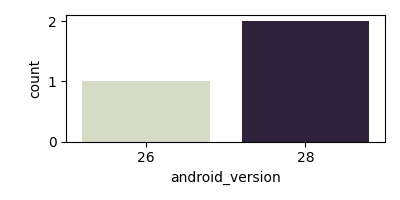

In [32]:
fig, axs = study_logs.get_metadata_plot("android_version", figsize=(4,2))
fig.tight_layout()
